<div style="text-align: center">
<img src="https://www.frenchscienceindia.org/wp-content/uploads/2017/02/Logo-Univ-Paris-Saclay.png" width="150px">
</div>

<div style="text-align: center">

# [Paris Saclay Center for Data Science](http://www.datascience-paris-saclay.fr)

# Predict used cars prices!


_Des lauriers Cédric, Cornille Théo_

# Introduction

When shopping for a used vehicle, typically an overriding concern is: Am I paying too much? This question is often difficult to answer due to the fact that it's hard to keep track of all the vehicles of interest currently available on the market.

A second, and related concern, is: Which vehicles with similar specifications are available? This information can help the buyer get a feel for what else is available on the market and provide an indication of the value of the vehicle currently under consideration.

<img src="https://s.aolcdn.com/dims-shared/dims3/GLOB/crop/5171x2799+0+467/resize/604x327!/format/jpg/quality/85/https://s.aolcdn.com/hss/storage/midas/595690b8efefcc733d8aeff94f7d6577/200776868/CR38W8.jpg" width="800px">

In this project, we would like to build a tool that helps both used car buyers and user car sellers. Indeed, it could help used car buyers to know which price they are going to pay depending on the characteristic they entered for a specific type of car. But, it will also help used car sellers to adjust their price.
Thus, the goal of this project is to develop prediction models able to predict the prices of used cars depending on their characteristics.
The solutions to this challenge must give the buyers some knowledge about what's make the price of a car.

## Metric used

In order to get accurate prices for new used cars, the mean squared error will be our metric for this challenge.

<img src="https://qph.fs.quoracdn.net/main-qimg-008e40d98b5ce869d6b19c8eb9108178" width="300px">

## The Data

The dataset we will manipulate comes from Ebay data. Ebay is an American multinational e-commerce corporation based in San Jose California, founded in 1995 that facilitates consumer-to-consumer and business-to-consumer sales through its website. Over 370000 used cars have been scraped with Scrapy.

As the content was in german, the data has been translated in english to be easily understandable. 

As inputs we have:
* name : "name" of the car
* seller : private or dealer
* price : the price on the ad to sell the car
* abtest
* vehicleType
* yearOfRegistration : at which year the car was first registered
* gearbox
* powerPS : power of the car in PS
* model
* kilometer : how many kilometers the car has driven
* monthOfRegistration : at which month the car was first registered
* fuelType
* brand
* notRepairedDamage : if the car has a damage which is not repaired yet
* postalCode
* dateCreated : the date for which the ad at ebay was created
* dateCrawled : when this ad was first crawled, all field-values are taken from this date
* lastSeenOnline : when the crawler saw this ad last online

The original dataset is taken from:
https://www.kaggle.com/orgesleka/used-cars-database

### Required dependencies and downloads

* `numpy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `imbalanced-learn`

You need to install our runing requirements to be able to use our notebook on your PC. Simply run the command below

In [ ]:
# !pip install -r requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  I ) Exploratory data analysis

### Loading the data

In [2]:
from problem import get_train_data

data_train, y_train = get_train_data()

In [3]:
print(data_train.shape)
data_train.head()

(210000, 16)


,name,seller,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen
0,Nissan_X_Trail_2.2_dCi_4x4,private,control,suv,2003,manual,114,x_trail,150000,11,diesel,nissan,no,2016-03-12 00:00:00,2016-03-12 09:55:46,2016-03-13 01:17:39
1,Volkswagen_Polo_1.4_DSG_Team,private,control,small,2011,automatic,86,polo,90000,5,gasoline,volkswagen,no,2016-04-03 00:00:00,2016-04-03 13:55:50,2016-04-05 12:46:50
2,Mercedes_Benz_E_200_CDI_DPF_BlueEFF_Avantga._P...,private,control,limousine,2010,automatic,136,e_klasse,150000,11,diesel,mercedes_benz,no,2016-03-11 00:00:00,2016-03-11 11:37:03,2016-04-07 05:44:58
3,BMW_328_i_Cabrio,private,test,convertible,1996,manual,193,3er,150000,3,gasoline,bmw,no,2016-03-28 00:00:00,2016-03-28 17:48:37,2016-04-02 22:47:01
4,BMW_316_TI_TÜV,private,control,NaN,2017,NaN,116,3er,150000,0,gasoline,bmw,no,2016-03-26 00:00:00,2016-03-26 12:47:25,2016-03-29 14:47:45


Values taken by specific rows:

In [4]:
cat_val = ["seller", "abtest", "gearbox","fuelType", "notRepairedDamage", "vehicleType"]
for col in cat_val:
    print ([col],":",data_train[col].unique())

['seller'] : ['private' 'dealer']
['abtest'] : ['control' 'test']
['gearbox'] : ['manual' 'automatic' nan]
['fuelType'] : ['diesel' 'gasoline' nan 'lpg' 'hybrid' 'cng' 'electric' 'other']
['notRepairedDamage'] : ['no' nan 'yes']
['vehicleType'] : ['suv' 'small' 'limousine' 'convertible' nan 'estate' 'bus' 'coupe'
 'other']


In [5]:
data_train.describe()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,210000.000000,210000.000000,210000.000000,210000.000000
mean,2003.352757,114.158414,125797.500000,5.831629
std,7.314191,70.155371,39533.808714,3.668086
min,1945.000000,0.000000,5000.000000,0.000000
25%,1999.000000,75.000000,100000.000000,3.000000
50%,2003.000000,107.000000,150000.000000,6.000000
75%,2008.000000,150.000000,150000.000000,9.000000
max,2017.000000,800.000000,150000.000000,12.000000


In [6]:
# We count the missing data for each variable
missing_values = data_train.isnull().sum()
missing_values

name                       0
seller                     0
abtest                     0
vehicleType            17070
yearOfRegistration         0
gearbox                 9409
powerPS                    0
model                  10188
kilometer                  0
monthOfRegistration        0
fuelType               16041
brand                      0
notRepairedDamage      37650
dateCreated                0
dateCrawled                0
lastSeen                   0
dtype: int64

Some values are missing ("NaN" Values). It must be replaced by zeros instead.

The function clean_and_transform from the file problem.py helps to treat and clean data.

In [7]:
from problem import clean_and_transform

X_train = clean_and_transform(data_train)

In [8]:
X_train.head()

,name,seller,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen
0,Nissan_X_Trail_2.2_dCi_4x4,1,0,8,2003,2,114,242,150000,11,2,23,1,2016-03-12,2016-03-12 09:55:46,2016-03-13 01:17:39
1,Volkswagen_Polo_1.4_DSG_Team,1,0,7,2011,0,86,174,90000,5,4,38,1,2016-04-03,2016-04-03 13:55:50,2016-04-05 12:46:50
2,Mercedes_Benz_E_200_CDI_DPF_BlueEFF_Avantga._P...,1,0,5,2010,0,136,97,150000,11,2,20,1,2016-03-11,2016-03-11 11:37:03,2016-04-07 05:44:58
3,BMW_328_i_Cabrio,1,1,2,1996,2,193,11,150000,3,4,2,1,2016-03-28,2016-03-28 17:48:37,2016-04-02 22:47:01
4,BMW_316_TI_TÜV,1,0,0,2017,1,116,11,150000,0,4,2,1,2016-03-26,2016-03-26 12:47:25,2016-03-29 14:47:45


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 16 columns):
name                   210000 non-null category
seller                 210000 non-null int8
abtest                 210000 non-null int8
vehicleType            210000 non-null int8
yearOfRegistration     210000 non-null int64
gearbox                210000 non-null int8
powerPS                210000 non-null int64
model                  210000 non-null int16
kilometer              210000 non-null int64
monthOfRegistration    210000 non-null int64
fuelType               210000 non-null int8
brand                  210000 non-null int8
notRepairedDamage      210000 non-null int8
dateCreated            210000 non-null datetime64[ns]
dateCrawled            210000 non-null datetime64[ns]
lastSeen               210000 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](3), int16(1), int64(4), int8(7)
memory usage: 19.9 MB


In [10]:
#corresponding to prices for each vehicle
y_train

array([ 4400, 10200, 16800, ...,  4250,  3200, 29000], dtype=int64)

## Testing data

In order to evaluate the performance of the submissions, the dataset has then been split in three parts (train, test, valid).

In this starting kit is provided only the test set.

The validation set (not provided) will be used as the hidden test data for the final evaluation.

The testing data can be loaded similarly as follows:

In [11]:
from problem import get_test_data

data_test, y_test = get_test_data()

In [12]:
data_test.head()

,name,seller,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen
0,Polo_9n_1.4_l,private,control,limousine,2003,manual,0,polo,125000,12,gasoline,volkswagen,NaN,2016-03-24 00:00:00,2016-03-24 22:55:07,2016-03-25 06:45:07
1,Smart_smart_fortwo_coupe_softouch_edition_high...,private,control,small,2009,automatic,71,fortwo,40000,9,gasoline,smart,no,2016-04-03 00:00:00,2016-04-03 12:53:07,2016-04-05 11:45:14
2,BMW_118_d_M_Sportpaket_/_Navi_/_Sitzhzg_/_8_Fach,private,test,limousine,2008,manual,143,1er,100000,4,diesel,bmw,no,2016-03-26 00:00:00,2016-03-26 18:40:58,2016-04-06 07:44:57
3,Volkswagen_Polo_1.4,private,test,small,1999,manual,60,polo,150000,3,gasoline,volkswagen,NaN,2016-03-23 00:00:00,2016-03-23 18:36:17,2016-03-23 19:42:29
4,Opel_movano_Hoch+Lang_aus_1.Besitz_mit_Klimaan...,private,test,other,2004,manual,0,andere,150000,2,diesel,opel,no,2016-03-31 00:00:00,2016-03-31 21:46:15,2016-03-31 21:46:15


In [13]:
#clean and treat test set
from problem import clean_and_transform

X_test = clean_and_transform(data_test)

In [14]:
X_test.head()

,name,seller,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen
0,Polo_9n_1.4_l,0,0,5,2003,2,0,175,125000,12,4,38,0,2016-03-24,2016-03-24 22:55:07,2016-03-25 06:45:07
1,Smart_smart_fortwo_coupe_softouch_edition_high...,0,0,7,2009,0,71,109,40000,9,4,32,1,2016-04-03,2016-04-03 12:53:07,2016-04-05 11:45:14
2,BMW_118_d_M_Sportpaket_/_Navi_/_Sitzhzg_/_8_Fach,0,1,5,2008,2,143,6,100000,4,2,2,1,2016-03-26,2016-03-26 18:40:58,2016-04-06 07:44:57
3,Volkswagen_Polo_1.4,0,1,7,1999,2,60,175,150000,3,4,38,0,2016-03-23,2016-03-23 18:36:17,2016-03-23 19:42:29
4,Opel_movano_Hoch+Lang_aus_1.Besitz_mit_Klimaan...,0,1,6,2004,2,0,40,150000,2,2,24,1,2016-03-31,2016-03-31 21:46:15,2016-03-31 21:46:15


# Data Visualization

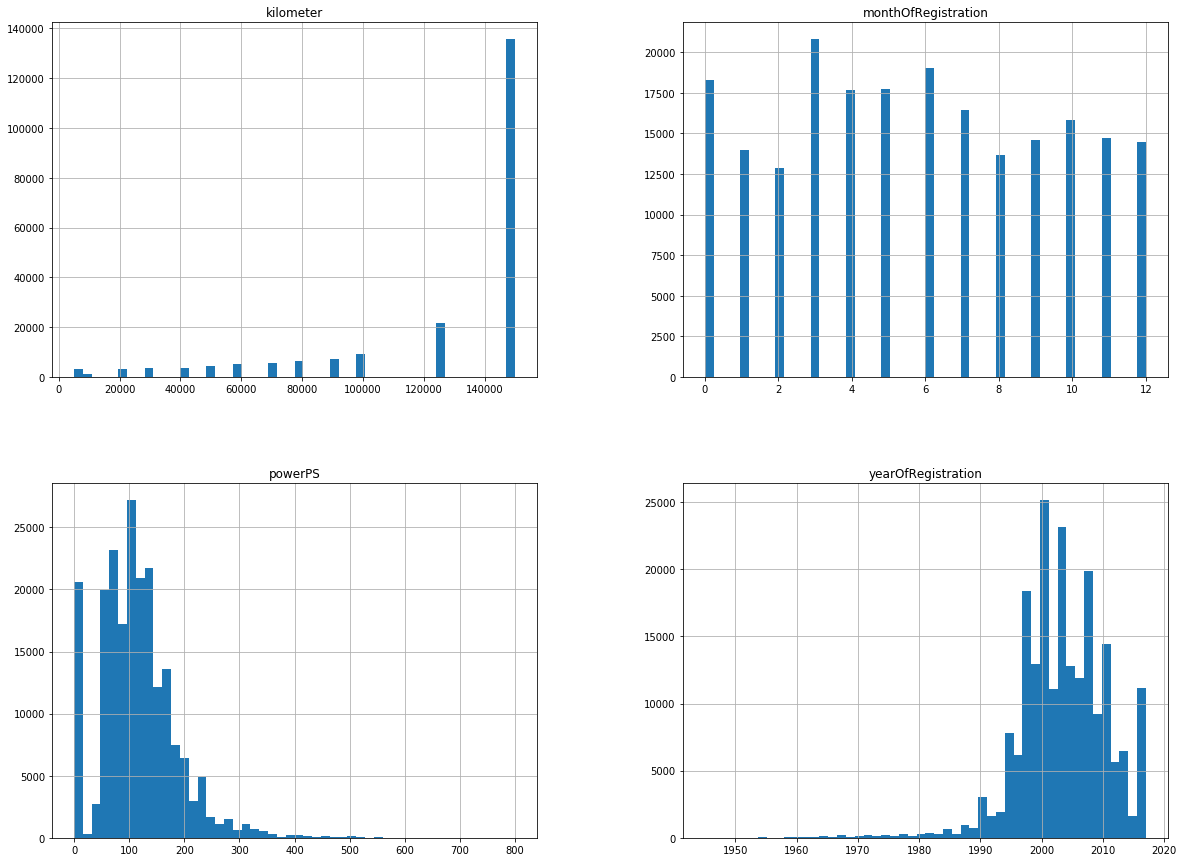

In [15]:
data_train.hist(bins=50, figsize=(20,15))
plt.show()

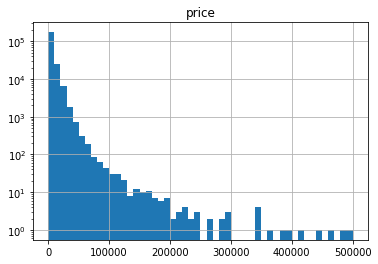

In [16]:
y_train = y_train.reshape(-1)
y_train_df = pd.DataFrame({'price': y_train}, columns = ['price'])
y_train_df.hist(bins = 50, log = True)
plt.show()

In [17]:
print('average price of car: {:.2f} €'.format(y_train.mean()))

average price of car: 5978.20 €


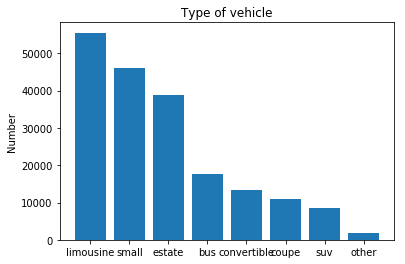

In [18]:
r = np.arange(min(8,len(data_train['vehicleType'].unique())))
g = data_train.groupby(by='vehicleType')['vehicleType'].count().sort_values(ascending=False)
y_pos = list(g.head(8))

plt.bar(r, y_pos) 
plt.xticks(r, g.index)
plt.ylabel('Number')
plt.title('Type of vehicle')
plt.show()

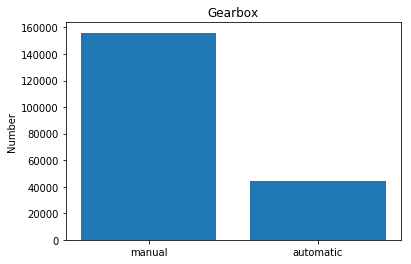

In [19]:
r = np.arange(1, len(data_train['gearbox'].unique()))
g = data_train.groupby(by='gearbox')['gearbox'].count().sort_values(ascending=False)
y_pos = list(g.head())

plt.bar(r, y_pos) 
plt.xticks(r, g.index)
plt.ylabel('Number')
plt.title('Gearbox')
plt.show()

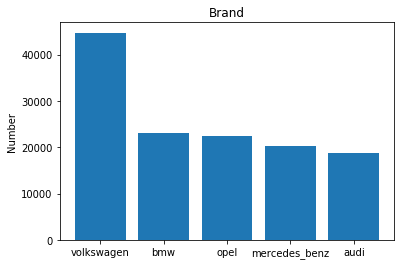

In [20]:
r = np.arange(min(5,len(data_train['brand'].unique())))
g = data_train.groupby(by='brand')['brand'].count().sort_values(ascending=False)
y_pos = list(g.head(5))

plt.bar(r, y_pos) 
plt.xticks(r, g.index)
plt.ylabel('Number')
plt.title('Brand')
plt.show()

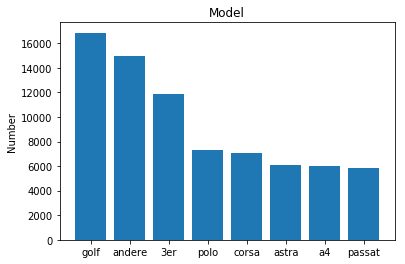

In [21]:
r = np.arange(min(8,len(data_train['model'].unique())))
g = data_train.groupby(by='model')['model'].count().sort_values(ascending=False)
y_pos = list(g.head(8))

plt.bar(r, y_pos) 
plt.xticks(r, g.index)
plt.ylabel('Number')
plt.title('Model')
plt.show()

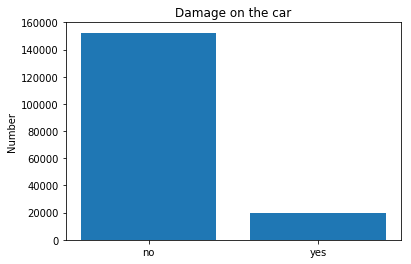

In [22]:
r = np.arange(1, len(data_train['notRepairedDamage'].unique()))
g = data_train.groupby(by='notRepairedDamage')['notRepairedDamage'].count().sort_values(ascending=False)
y_pos = list(g.head())

plt.bar(r, y_pos) 
plt.xticks(r, g.index)
plt.ylabel('Number')
plt.title('Damage on the car')
plt.show()

In [23]:
def plot_correlation_map(df, num):
    corr = df.corr()
    _ , ax = plt.subplots(figsize =(num, num))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .8 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [24]:
data = pd.concat([X_train, y_train_df], axis=1, sort=False)

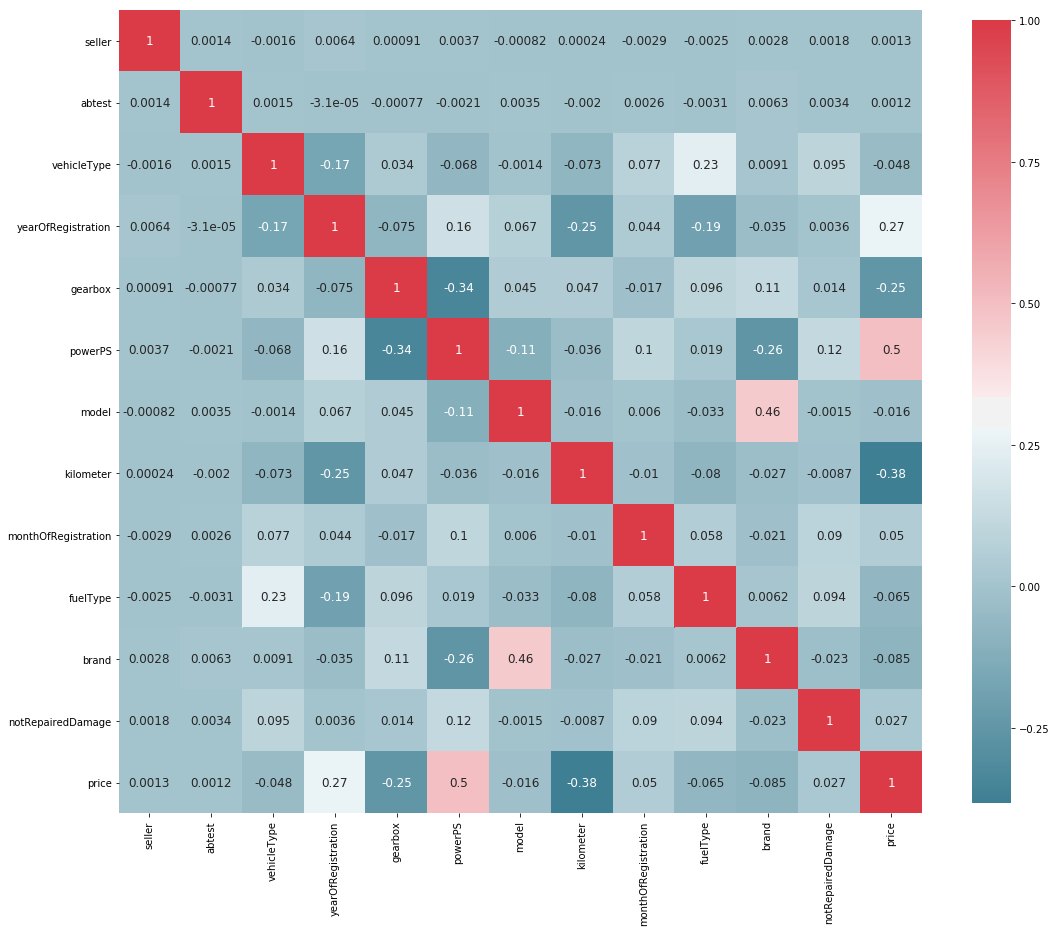

In [25]:
plot_correlation_map(data, 18)

The correlation map tells us that the price is correlated with the horsepower, the kilometers and the year of registration.

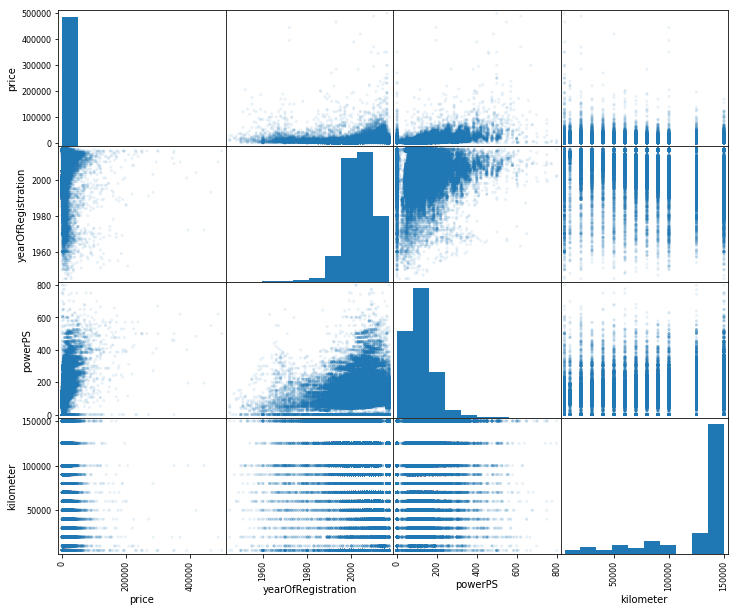

In [26]:
col = ["price", "yearOfRegistration", "powerPS", "kilometer"]
pd.plotting.scatter_matrix(data[col], figsize = (12,10), alpha = 0.1)
plt.show()

It seems that the most cars haven been registered after 1990 and have lower horsepower than 180.

Many cars have more than approximately 130.000 kilometers.

## Workflow

<img src="img/carrampchall.jpg">

# The model to submit

The submission consists of two files: feature_extractor.py which defines a FeatureExtractor class, and regressor.py which defines a CRegressor class

* FeatureExtractor can (optionally) hold code to calculate, filter or add additional features.
* Regressor fits the model and predicts on (new) data, as outputted by the Feature Extractor.

### Feature extractor

An example FeatureExtractor, adding an additional feature based on the length of the name of the car

In [27]:
y_train = y_train.reshape(-1,1)

In [28]:
import pandas as pd
import numpy as np

#scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

class FeatureExtractor():
    def __init__(self):
        pass

    
    def fit(self, X_df, y=None):
        return self
    
    
    def transform(self, X_df, y=None):
        X_df_new = X_df.copy()
        
        #add features
        X_df_new = self.add_features(X_df_new)
        
        #drop columns
        X_df_new = self.drop_columns(X_df_new)
        
        #select specific raws in a table (need y to reduce y length too)
        if y is not None:
            X_df_new, y = self.select_data(X_df_new, y)
        
        
        X_df_new = X_df_new.values
        
        if y is not None:
            return X_df_new, y
        else:
            return X_df_new
    
    
    def drop_columns(self, X_df, columns_to_drop=["name", "dateCrawled", "abtest", "dateCreated", "lastSeen", "seller"]):
        X_df_new = X_df.copy()
        X_df_new = X_df_new.drop(columns_to_drop, axis=1)
        return X_df_new
    
    
    def add_features(self, X_df):
        X_df_new = X_df.copy()
        X_df_new['name_len'] = [min(70, len(n)) for n in X_df_new['name']]
        
        return X_df_new
    
    def select_data(self, X, y):
        y_df = pd.DataFrame({'price': y}, columns = ['price'])
        data = pd.concat([X, y_df], axis=1, sort=False)
        
        data = data[(data["powerPS"].between(100, 500, inclusive=True))] 
        data = data[(data["price"].between(100, 200000, inclusive=True))]
        
        X_df_new = data.drop(["price"], axis=1)
        y = data["price"].values
        
        return X_df_new, y

or test it directly on data as this example:

In [29]:
fe = FeatureExtractor()
fe.fit(X_train, y_train)
New_X_train = fe.transform(X_train)
print(New_X_train.shape)

(210000, 11)


In [30]:
New_X_train

array([[   8, 2003,    2, ...,   23,    1,   26],
       [   7, 2011,    0, ...,   38,    1,   28],
       [   5, 2010,    0, ...,   20,    1,   62],
       ...,
       [   7, 2006,    2, ...,   38,    1,   59],
       [   7, 1998,    0, ...,   38,    1,   37],
       [   2, 2011,    0, ...,   20,    1,   65]], dtype=int64)

In [31]:
X_train = fe.add_features(X_train)

In [32]:
X_train.head()

,name,seller,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen,name_len
0,Nissan_X_Trail_2.2_dCi_4x4,1,0,8,2003,2,114,242,150000,11,2,23,1,2016-03-12,2016-03-12 09:55:46,2016-03-13 01:17:39,26
1,Volkswagen_Polo_1.4_DSG_Team,1,0,7,2011,0,86,174,90000,5,4,38,1,2016-04-03,2016-04-03 13:55:50,2016-04-05 12:46:50,28
2,Mercedes_Benz_E_200_CDI_DPF_BlueEFF_Avantga._P...,1,0,5,2010,0,136,97,150000,11,2,20,1,2016-03-11,2016-03-11 11:37:03,2016-04-07 05:44:58,62
3,BMW_328_i_Cabrio,1,1,2,1996,2,193,11,150000,3,4,2,1,2016-03-28,2016-03-28 17:48:37,2016-04-02 22:47:01,16
4,BMW_316_TI_TÜV,1,0,0,2017,1,116,11,150000,0,4,2,1,2016-03-26,2016-03-26 12:47:25,2016-03-29 14:47:45,14


Analysis of length car name feature

C:\Users\TCO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\TCO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


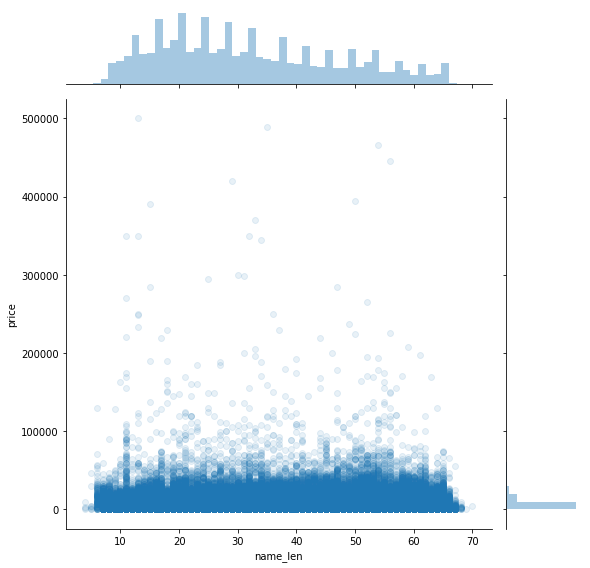

In [33]:
data = pd.concat([X_train, y_train_df], axis=1, sort=False)
ax = sns.jointplot(x='name_len', y='price', data=data.get(['name_len','price']), alpha=0.1, size=8)

It seems that a name length between 15 and 30 characters is better for the sale price. An explanation could be that a longer name includes more optionals and accessories and therefore the price is obviously higher. Very short and very long names do not work well.

## Regressor

And an example Regressor doing a standard scaling and Decision Tree regression for the price prediction:

In [34]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV


class Regressor(BaseEstimator):
    def __init__(self):
        self.reg = DecisionTreeRegressor(random_state=42)
        #self.reg = LinearRegression()

    def fit(self, X, y):
        self.reg.fit(X, y)


    def predict(self, X):
        return self.reg.predict(X)[:, np.newaxis]  #(:, 1)

## Test pipeline 

Using thus model interactively in the notebook to fit on the training data and predict for the testing data:

In [35]:
from sklearn.pipeline import make_pipeline

In [36]:
model = make_pipeline(FeatureExtractor(), Regressor())

In [37]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('featureextractor', <__main__.FeatureExtractor object at 0x000001F4546D02E8>), ('regressor', Regressor())])

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred.shape

(70000, 1)

In [40]:
y_pred

array([[ 2750.],
       [ 4970.],
       [15999.],
       ...,
       [12900.],
       [  299.],
       [ 3800.]])

In [41]:
from sklearn.metrics import mean_squared_error

print("RMSE on test:",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE on test: 6743.051605967119


## Evaluation with Cross-Validation

The metrics explained above are actually calcualted using a cross-validation approach (5-fold cross-validation):

In [42]:
from sklearn.model_selection import cross_val_score

def evaluation(model, X, y):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=4)
    
    results = np.sqrt(-scores)
    
    return results

In [43]:
results = evaluation(model, X_train, y_train)

In [44]:
print("Scores:", results)
print("Mean:", results.mean())
print("Standard deviation:", results.std())

Scores: [5768.04588471 6892.83373392 6223.84903107 6164.64833654]
Mean: 6262.344246559533
Standard deviation: 404.0031672678011


## Submitting to the online challenge: ramp.studio

In [149]:
#to make the line behind work, 
#you need to go to 'problem.py' file and change the function "_read_data".
#the solution is explained in the file.
!ramp_test_submission --submission starting_kit

Testing Cars price
Reading train and test files from ./data ...
Reading cv ...
Training .\submissions\starting_kit ...
CV fold 0
	score     rmse
	train   303.92
	valid  6449.75
	test   7404.98
CV fold 1
	score     rmse
	train   295.71
	valid  6430.77
	test   6530.92
CV fold 2
	score     rmse
	train   252.51
	valid  5697.53
	test   7157.58
CV fold 3
	score     rmse
	train   205.09
	valid  6493.39
	test   7150.13
CV fold 4
	score     rmse
	train   307.99
	valid  6132.66
	test   6622.61
----------------------------
Mean CV scores
----------------------------
	score               rmse
	train    273.04 ± 39.315
	valid  6240.82 ± 300.128
	test   6973.24 ± 337.714
----------------------------
Bagged scores
----------------------------
	score     rmse
	valid  6248.03
	test   5716.96


## Advices 

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., locally, and checking them with ramp_test_submission. The script prints mean cross-validation scores

# Challenge solving !

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Advanced Data processing

In [47]:
X_train.head()

,name,seller,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen,name_len
0,Nissan_X_Trail_2.2_dCi_4x4,1,0,8,2003,2,114,242,150000,11,2,23,1,2016-03-12,2016-03-12 09:55:46,2016-03-13 01:17:39,26
1,Volkswagen_Polo_1.4_DSG_Team,1,0,7,2011,0,86,174,90000,5,4,38,1,2016-04-03,2016-04-03 13:55:50,2016-04-05 12:46:50,28
2,Mercedes_Benz_E_200_CDI_DPF_BlueEFF_Avantga._P...,1,0,5,2010,0,136,97,150000,11,2,20,1,2016-03-11,2016-03-11 11:37:03,2016-04-07 05:44:58,62
3,BMW_328_i_Cabrio,1,1,2,1996,2,193,11,150000,3,4,2,1,2016-03-28,2016-03-28 17:48:37,2016-04-02 22:47:01,16
4,BMW_316_TI_TÜV,1,0,0,2017,1,116,11,150000,0,4,2,1,2016-03-26,2016-03-26 12:47:25,2016-03-29 14:47:45,14


In [48]:
X_train = X_train.drop(["name", "seller", "abtest", "dateCreated", "dateCrawled", "lastSeen", "name_len"], axis=1)

In [51]:
cat_attribs = ["vehicleType", "fuelType", "brand", "notRepairedDamage"]

In [52]:
num_attribs = list(X_train.drop(cat_attribs, axis=1))

In [53]:
# Create a class to select numerical or categorical columns
class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [54]:
num_pipeline = Pipeline([
    ("selector", DFSelector(num_attribs)),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DFSelector(cat_attribs)),
    ("encoder", OneHotEncoder(sparse=True))
])

full_pipeline = FeatureUnion(transformer_list =[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [55]:
X_train_transformed = full_pipeline.fit_transform(X_train)

C:\Users\TCO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\TCO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Comparing Models

**Linear regression**

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
y_pred = lin_reg.predict(X_train_transformed)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1945.6958022650138

**Decision tree regressor**

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_transformed, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [86]:
y_pred = tree_reg.predict(X_train_transformed)
tree_mse = mean_squared_error(y_train, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

179.02539908071324

**Random forest regressor**

In [60]:
from sklearn.ensemble import RandomForestRegressor

y_train = y_train.reshape(-1)
forest_reg = RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30 )
forest_reg.fit(X_train_transformed, y_train)

C:\Users\TCO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [87]:
y_pred = forest_reg.predict(X_train_transformed)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2138.5401283421534

## Cross-Validation

**Linear regression**

In [62]:
results = evaluation(lin_reg, X_train_transformed, y_train)

In [63]:
print("Scores:", results)
print("Mean:", results.mean())
print("Standard deviation:", results.std())

Scores: [7448.36741328 6996.84540975 6444.78655079 6572.13484117]
Mean: 6865.533553747925
Standard deviation: 393.7159370608159


**Decision tree regressor**

In [64]:
results = evaluation(tree_reg, X_train_transformed, y_train)

In [65]:
print("Scores:", results)
print("Mean:", results.mean())
print("Standard deviation:", results.std())

Scores: [5342.59623569 5328.89020368 4991.08142966 5009.98072805]
Mean: 5168.137149271159
Standard deviation: 167.80919131332243


**Random forest regressor**

In [66]:
y_train = y_train.reshape(-1)
results = evaluation(forest_reg, X_train_transformed, y_train)

C:\Users\TCO\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\TCO\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\TCO\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\TCO\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed

In [67]:
print("Scores:", results)
print("Mean:", results.mean())
print("Standard deviation:", results.std())

Scores: [4933.85670001 4750.81435386 4073.99237699 4482.46774622]
Mean: 4560.282794270154
Standard deviation: 323.4166391410143


## Feature importance

In [68]:
feature_importances = forest_reg.feature_importances_
feature_importances

array([0.19849379, 0.0064395 , 0.32888607, ..., 0.00072523, 0.00486636,
       0.00227569])

In [69]:
attributes = num_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32888607064505065, 'powerPS'),
 (0.19849378718085497, 'yearOfRegistration'),
 (0.14361977514061539, 'kilometer'),
 (0.026324898979772658, 'model'),
 (0.010549009218981036, 'monthOfRegistration'),
 (0.0064395015323089125, 'gearbox')]

# Final Model

In [92]:
final_model = forest_reg

In [99]:
X_test = X_test.drop(["seller", "abtest", "dateCreated", "dateCrawled", "lastSeen", "name"], axis=1)

In [118]:
X_test_transformed = full_pipeline.transform(X_test)

C:\Users\TCO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [119]:
y_pred = final_model.predict(X_test_transformed)

In [125]:
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_rmse

5220.97598230237

In [126]:
final_model.score(X_test_transformed, y_test)

0.7001378386006278